In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv')
df.head(3)

   Unnamed: 0  year  age      sex            maritl      race  \
0      231655  2006   18  1. Male  1. Never Married  1. White   
1       86582  2004   24  1. Male  1. Never Married  1. White   
2      161300  2003   45  1. Male        2. Married  1. White   

         education              region        jobclass          health  \
0     1. < HS Grad  2. Middle Atlantic   1. Industrial       1. <=Good   
1  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
2  3. Some College  2. Middle Atlantic   1. Industrial       1. <=Good   

  health_ins   logwage        wage  
0      2. No  4.318063   75.043154  
1      2. No  4.255273   70.476020  
2     1. Yes  4.875061  130.982177  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [5]:
X1 = PolynomialFeatures(1).fit_transform(df.age.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(df.age.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(df.age.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(df.age.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(df.age.reshape(-1,1))

y = (df.wage > 250).map({False:0, True:1}).as_matrix()
print('X4:\n', X4[:5])
print('y:\n', y[:5])

('X4:\n', array([[  1.00000000e+00,   1.80000000e+01,   3.24000000e+02,
          5.83200000e+03,   1.04976000e+05],
       [  1.00000000e+00,   2.40000000e+01,   5.76000000e+02,
          1.38240000e+04,   3.31776000e+05],
       [  1.00000000e+00,   4.50000000e+01,   2.02500000e+03,
          9.11250000e+04,   4.10062500e+06],
       [  1.00000000e+00,   4.30000000e+01,   1.84900000e+03,
          7.95070000e+04,   3.41880100e+06],
       [  1.00000000e+00,   5.00000000e+01,   2.50000000e+03,
          1.25000000e+05,   6.25000000e+06]]))
('y:\n', array([0, 0, 0, 0, 0]))


/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is depr

In [6]:
fit2 = sm.GLS(df.wage, X4).fit()
fit2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
x1,21.2455,5.887,3.609,0.000,9.703,32.788
x2,-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x3,0.0068,0.003,2.221,0.026,0.001,0.013
x4,-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [7]:
fit_1 = fit = sm.GLS(df.wage, X1).fit()
fit_2 = fit = sm.GLS(df.wage, X2).fit()
fit_3 = fit = sm.GLS(df.wage, X3).fit()
fit_4 = fit = sm.GLS(df.wage, X4).fit()
fit_5 = fit = sm.GLS(df.wage, X5).fit()

sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01

In [8]:
X = X4

In [9]:
clf = sm.GLM(y, X, family=sm.families.Binomial(sm.families.links.logit))
res = clf.fit()

In [10]:
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)

In [11]:
X_test = PolynomialFeatures(4).fit_transform(age_grid)
pred = res.predict(X_test)

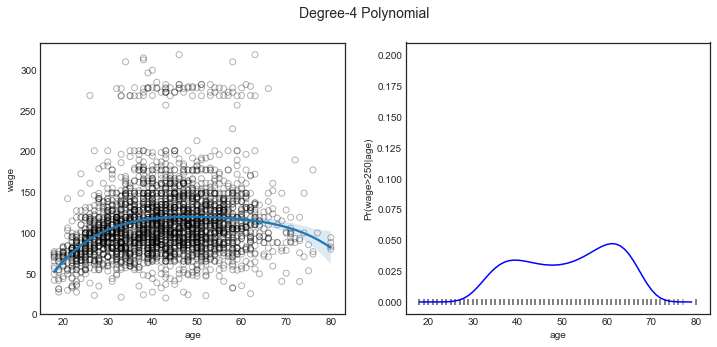

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(df.age, df.wage, order = 4, truncate=True, scatter=False, ax=ax1)
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(age_grid, pred, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

In [13]:
df_cut, bins = pd.cut(df.age, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [14]:
df_steps = pd.concat([df.age, df_cut, df.wage], keys=['age','age_cuts','wage'], axis=1)
df_steps.head(5)

   age        age_cuts        wage
0   18  (17.938, 33.5]   75.043154
1   24  (17.938, 33.5]   70.476020
2   45    (33.5, 49.0]  130.982177
3   43    (33.5, 49.0]  154.685293
4   50    (49.0, 64.5]   75.043154

In [15]:
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)

df_steps_dummies.head(5)

   const  (17.938, 33.5]  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0    1.0               1             0             0             0
1    1.0               1             0             0             0
2    1.0               0             1             0             0
3    1.0               0             1             0             0
4    1.0               0             0             1             0

In [38]:
fit3 = sm.GLM(df_steps.wage, (df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1))).fit()
fit3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.265,97.051
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.468,27.639
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.611,27.718
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.135,17.416


In [39]:
bin_mapping = np.digitize(age_grid.ravel(), bins)
bin_mapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [40]:
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))
X_test2.head()

   const  2  3  4
0    1.0  0  0  0
1    1.0  0  0  0
2    1.0  0  0  0
3    1.0  0  0  0
4    1.0  0  0  0

In [41]:
pred2 = fit3.predict(X_test2)

In [43]:
clf2 = sm.GLM(y, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1),
              family=sm.families.Binomial(sm.families.links.logit))
res2 = clf2.fit()
pred3 = res2.predict(X_test2)

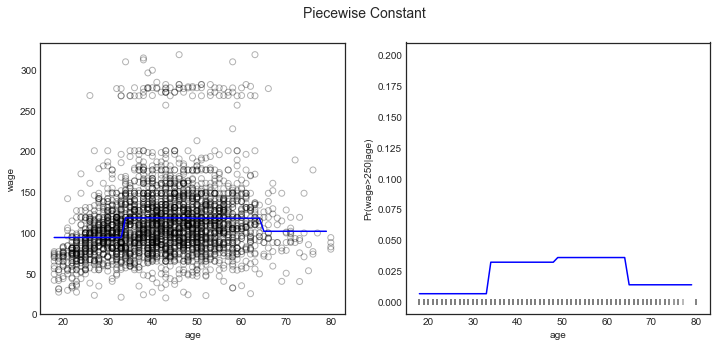

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(np.arange(df.age.min(), df.age.max()).reshape(-1,1), pred3, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

In [45]:
transformed_x = dmatrix("bs(df.age, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"df.age": df.age}, return_type='dataframe')
fit4 = sm.GLM(df.wage, transformed_x).fit()
pred4 = fit4.predict(dmatrix("bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit4.params

Intercept                                                               60.493714
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

In [46]:
transformed_x2 = dmatrix("bs(df.age, df=6, degree=3, include_intercept=False)",
                        {"df.age": df.age}, return_type='dataframe')
fit5 = sm.GLM(df.wage, transformed_x2).fit()
pred5 = fit5.predict(dmatrix("bs(age_grid, df=6, degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit5.params

Intercept                                                 56.313841
bs(df.age, df=6, degree=3, include_intercept=False)[0]    27.824002
bs(df.age, df=6, degree=3, include_intercept=False)[1]    54.062546
bs(df.age, df=6, degree=3, include_intercept=False)[2]    65.828391
bs(df.age, df=6, degree=3, include_intercept=False)[3]    55.812734
bs(df.age, df=6, degree=3, include_intercept=False)[4]    72.131473
bs(df.age, df=6, degree=3, include_intercept=False)[5]    14.750876
dtype: float64

In [47]:
transformed_x3 = dmatrix("cr(df.age, df=4)", {"df.age": df.age}, return_type='dataframe')
fit6 = sm.GLM(df.wage, transformed_x3).fit()
pred6 = fit6.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))
fit6.params

Intercept             -6.970341e+13
cr(df.age, df=4)[0]    6.970341e+13
cr(df.age, df=4)[1]    6.970341e+13
cr(df.age, df=4)[2]    6.970341e+13
cr(df.age, df=4)[3]    6.970341e+13
dtype: float64

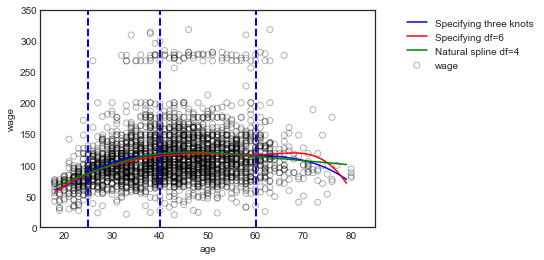

In [48]:
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(age_grid, pred4, color='b', label='Specifying three knots')
plt.plot(age_grid, pred5, color='r', label='Specifying df=6')
plt.plot(age_grid, pred6, color='g', label='Natural spline df=4')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [25,40,60]]
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');